In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.optimize import curve_fit

import messwerte as mw

In [2]:
n = 10,
c_0 = 5,
kappa_0 = 0.67
x_0 = 1
x_1 = 1000
epsilon=5e-2

lx, ly = mw.rand_pot_messwerte(
    n=10,
    x_0=x_0,
    x_1=x_1,
    c=c_0,
    kappa=kappa_0,
    epsilon=epsilon
)

df = pd.DataFrame(
    {
        'x': lx,
        'y': ly
    }
)

df

,x,y
0,1.000000,4.752360
1,2.154435,7.692671
2,4.641589,15.467321
3,10.000000,21.997377
4,21.544347,37.891280
5,46.415888,58.583871
6,100.000000,124.612076
7,215.443469,183.783788
8,464.158883,292.936989
9,1000.000000,545.465323


In [3]:
def f_lin(x, a,b):
    return a*x+b

In die Funktion `curve_fit()` werden nicht die Daten `df.x` und `df.y` eingetragen, denn es handelt sich hier nicht um lineare Regression.

Vielmehr folgt aus

$$
  y = c\,x^\kappa
$$

durch logarithmieren beider Seiten der Gleichung

\begin{align}
  \log(y) &= \underbrace{\log(c)}_{b} + \underbrace{\kappa}_{a}\,\log(x)
\end{align}

Das heißt, in einem doppelt logarithmisch geteilten Diagramm ist die Potenzfunktion $y=c\,x^\varkappa$ eine Gerade. Die Parameter dieser Geraden können durch lineare Regression berechnet werden. Dazu werden der Funktion `curve_fit` statt `df.x` und `df.y` die logarithmierten Werte `np.log(df.x)` und `np.log(df.y)` übergeben. Für die Ergebnisse der Regression ist dann

\begin{align}
  \kappa &= a\\
  \log(c) &= b \quad\implies\quad c = \mathrm{e}^b
\end{align}

In [4]:
p_opt, cov_opt = curve_fit(f_lin, np.log(df.x),np.log(df.y))
p_opt

array([0.68048849, 1.5651065 ])

In [5]:
a,b = p_opt
kappa=a
c=np.exp(b)

(c,kappa)

(4.783184303657614, 0.6804884897702406)

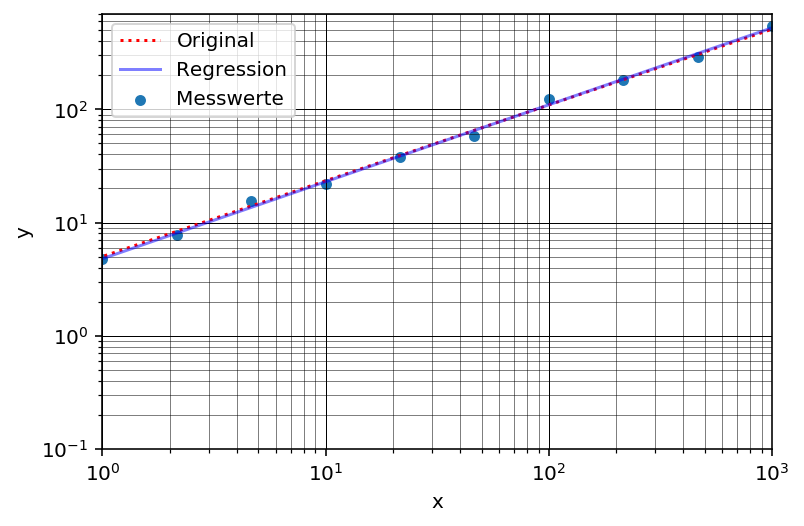

In [6]:
ax = df.plot(kind='scatter',loglog=True, x='x',y='y', label='Messwerte')

lx = np.linspace(1e-1,1e3,200)
ax.plot(lx,c_0*lx**kappa_0,c='r',ls='dotted',label='Original')
ax.plot(lx,c*lx**kappa,c='b',label='Regression',alpha=0.5)
ax.set(xlim=(1,1e3),ylim=(1e-1,0.7e3))
ax.grid(which='major',lw=0.5,c='k')
ax.grid(which='minor',lw=0.25,c='k')

ax.legend()

In [7]:
#df.to_csv('Testdaten_Potenz.csv',index=None)